In [2]:
import matplotlib.pyplot as plt
import numpy as np
BIOMARKER_DIR = '/home/groups/dpwall/briannac/sequence_based_biomarkers/'
import sys
import scipy.sparse
sys.path.append('/home/groups/dpwall/briannac/sequence_based_biomarkers/src/nonparametric_pvalues')
from fast_stats import *

In [3]:
import pandas as pd

In [4]:
BIOMARKER_DIR='/home/groups/dpwall/briannac/sequence_based_biomarkers/'

/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


5.851336991612087 5.031705182978961
5.845568497471199 5.1748716239488095
5.412248707189991 5.1324446577154585
5.857296594726953 5.266030219709117
3.692596176069117 4.421278942235592
5.985098158382642 4.909679444553238


/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


6.650986822227462 5.339463313247307
5.161189535844519 4.31004165982383
6.800691181025916 5.2830726611606345


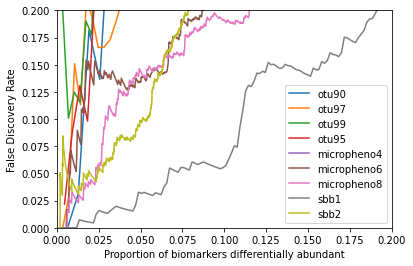

In [52]:
iter_idx=1
for dataset in ['obesity']:
    sample_data = pd.read_table(BIOMARKER_DIR + 'data/%s/sample_metadata.tsv' % (dataset))
    for biomarker in ['otu90', 'otu97', 'otu99', 'otu95', 'micropheno4', 'micropheno6', 'micropheno8', 'sbb1', 'sbb2']:
        stats = abs(np.load('/home/groups/dpwall/briannac/sequence_based_biomarkers/results/rank_stats/rank_stat_%s_%s.npy' % (dataset, biomarker)))
        permuted_stats = abs(np.loadtxt('/home/groups/dpwall/briannac/sequence_based_biomarkers/intermediate_files/nonparametric_pvalues/%s_%s/permuted_rank_stat_%s_%s_%i.txt' % (dataset, biomarker, dataset, biomarker, iter_idx)))
        counts = countGreaterThanEqual(sorted(stats), sorted(permuted_stats))
        FDR = [fp/ap for fp, ap in zip(counts[::-1]/len(permuted_stats), [i/len(counts) for i in range(len(counts))])]
        #plt.plot([i/len(FDR) for i in range(len(FDR))], [fp/ap for fp, ap in zip(FDR[::-1]/200000, [i/len(FDR) for i in range(len(FDR))])])
        plt.plot([i/len(stats) for i in range(len(stats))],FDR, label=biomarker)
        #plt.xscale('log')
        #plt.yscale('log')
        plt.ylim(0,.2)
        plt.xlim(0,.2)
        plt.xlabel('Proportion of biomarkers differentially abundant')
        plt.ylabel('False Discovery Rate')
        plt.legend()

In [7]:
person_biomarker = scipy.sparse.load_npz(BIOMARKER_DIR + 'results/generate_biomarkers/sample_vs_biomarker_%s_%s.npz' % (biomarker, dataset)).toarray()

In [8]:
d = person_biomarker[::2]-person_biomarker[1::2]

In [28]:
diffs_rank[0]

array([ 64., 205., 290., 116., 241., 154., 211., 103., 109., 299.,  72.,
       155., 227., 158., 121., 118.,  34., 234., 111., 302., 274., 249.,
       204., 301., 119., 305., 156., 175., 172., 152., 188.,  87.,  76.,
        42.,  83.,  80.,  90., 283., 293., 266.,  61., 150.,  45.,  94.,
       180., 206., 238., 245.,   7., 251., 263., 276., 244., 174.,  19.,
       222., 218., 113., 207.,  39.,  13.,  28., 140.,  49.,  68., 247.,
       273., 139.,  12.,  16., 203.,  35.,  26.,  48., 127., 130., 138.,
       209.,  31., 199., 239., 177., 125., 228., 284., 168., 182., 310.,
       148.,  33.,  91., 271.,  82., 297., 264., 304., 265.,  29., 289.,
        55., 232., 151., 259., 120.,  27.,  60.,  22., 269., 275., 117.,
       230., 317., 320., 115., 108.,  18., 243., 220., 303.,  98., 143.,
       318., 314., 311., 292., 165., 122., 316.,  30., 106., 294., 100.,
       190.,  65.,  25., 161., 181.,  67., 196., 191., 225., 226., 163.,
       110., 217., 233., 212., 278., 254., 291.,  7

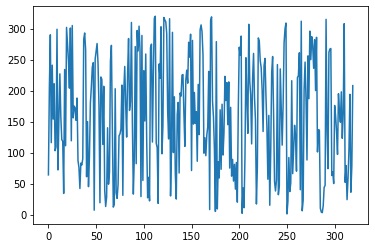

In [33]:
plt.plot(diffs_rank[0])

In [34]:
import scipy.stats.mstats as mstats
sys.path.append('/home/groups/dpwall/briannac/sequence_based_biomarkers/src/nonparametric_pvalues')
from fast_stats import *
diffs_gt_zeros = 1*(d>0) - 1*(d<0)
d[d==0] = np.nan
d = abs(person_biomarker[::2]-person_biomarker[1::2])
diffs_rank = mstats.rankdata(np.ma.masked_invalid(d), axis=0)
diffs_rank = diffs_rank.transpose()
diffs_gt_zeros = diffs_gt_zeros.transpose()
#diffs_gt_zero_permute = diffs_gt_zeros*(2*permuted_phenos[rand_idx,::2]-1)
#pvals_permute = [wilcoxon_fast(diffs_gt_zero, rank) for diffs_gt_zero, rank in zip(diffs_gt_zero_permute, diffs_rank)]
pvals_data = [wilcoxon_fast(diffs_gt_zero, rank) for diffs_gt_zero, rank in zip(diffs_gt_zeros, diffs_rank)]

/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


(array([  1.,   0.,   1.,   5.,   2.,  30., 112.,  25.,   5.,   2.]),
 array([-37.43293994, -31.785335  , -26.13773007, -20.49012513,
        -14.8425202 ,  -9.19491526,  -3.54731033,   2.10029461,
          7.74789954,  13.39550448,  19.04310941]),
 <BarContainer object of 10 artists>)

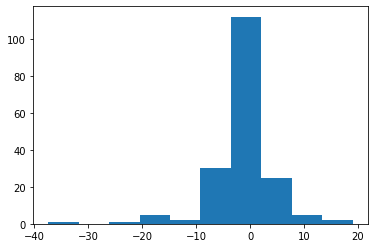

In [35]:
plt.hist(pvals_data)

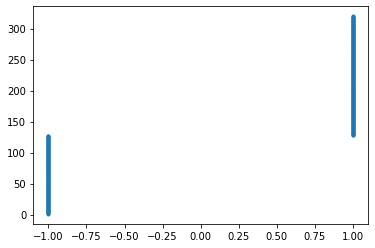

In [14]:
plt.plot(diffs_gt_zeros[0], (1*diffs_rank)[0], '.')

(array([ 1.,  3.,  9., 24., 31., 29., 39., 23., 12., 12.]),
 array([-1.09669562,  0.13783758,  1.37237079,  2.60690399,  3.8414372 ,
         5.07597041,  6.31050361,  7.54503682,  8.77957002, 10.01410323,
        11.24863644]),
 <BarContainer object of 10 artists>)

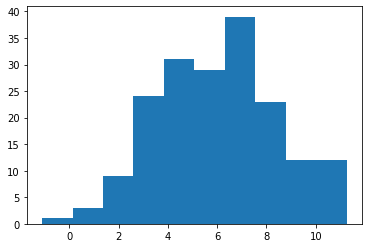

In [78]:
plt.hist(pvals_data)

In [73]:
pvals_permute

[-10.59682374764803,
 -2.694291553681814,
 -10.59682374764803,
 -6.89006945339896,
 -8.847188650754001,
 -7.172755224918373,
 -5.754020704192765,
 -6.933336595145281,
 -9.694578577376195,
 -9.713553855737759,
 -3.504781376193791,
 -3.5886320609276545,
 -7.213927092098542,
 -6.100177025195744,
 -6.242213431822454,
 -10.59682374764803,
 -2.6747243853590614,
 -3.7417530685569553,
 -4.730042006930554,
 -7.8244550917000035,
 -3.405849994007417,
 -4.84336078227833,
 -5.20681003845704,
 -5.836443797844272,
 -6.8334648129536175,
 -4.244255578953197,
 -8.105928271617733,
 -7.335426648468753,
 -5.783176762231122,
 -5.862343858348937,
 -8.204810547546531,
 -6.380452186017141,
 -2.5594442968404154,
 -6.291916465834102,
 -2.9348695848854973,
 -6.817238759720646,
 -8.204810547546531,
 -3.865036192845319,
 -6.787075520916545,
 -6.320484263402927,
 -6.728669135570721,
 -4.840824718981235,
 -2.85471855086556,
 -10.749569668805446,
 -6.732051753224151,
 -11.248636435135698,
 -6.165110795120049,
 -5.9787

In [40]:
sorted(diffs_rank[0])

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0,
 139

In [34]:
len(pvals_permute)

183

In [32]:
diffs_gt_zero_permute.sum(axis=1)

array([ 66, -22,  66, -15,  24, -11, -26, -16,  44,  44, -38,  -2,   3,
       -32,  15,  66,  -6,  -2, -14,   2, -72, -33,  -2, -24,  -8,  -5,
        18,  -8, -23,  20,  10,  -8, -25,  -8,  -6,   7,  10, -61,   5,
       -24, -20,  12, -11,  70, -17,  84,  11,   4,  -1,   6,  36,  -3,
       -48, -54,  -4, -79, -21, -41,  10, -20,  66, -23,  38,  12, -21,
         1,  14,  -9,  -5,  -7,  24, -31,  21,  -9,   5,   9,  33, -28,
        13, -41,  27, -55, -20,  -5, -15, -34,  -5,  32, -29,   8,   0,
        -8, -47, -29, -25,  30,   6, -27,  64, -23,  -1,  -6, -35, -80,
         6, -38,  -1,   5,  76,   8,  -7,  43, -34, -35, -27,  23,   5,
         3,  19,  15,  23,  -8,  -3, -12,  -8,   8,  11, -18, -65, -18,
         3, -18,   1,  14, -41,   2,  -8,  -2,  25, -20,  20,   4,  30,
       -29,  14,  -1, -16,  -4,  11,  -2, -33,   5,  66,  -9,   6, -18,
       -13,  84, -12,  16,   9,   1, -36, -11,  24, -35, -24,  27, -11,
        23, -15,  66, -24,  -8,  67, -12,  13,  46, -36,  -6,  3

In [29]:
diffs_gt_zero_permute

array([[-1,  1,  1, ..., -1, -1,  1],
       [ 0,  0,  0, ..., -1,  0,  0],
       [ 1,  1,  1, ...,  1, -1, -1],
       ...,
       [ 1,  1, -1, ..., -1, -1,  1],
       [ 1, -1, -1, ...,  1, -1, -1],
       [-1, -1, -1, ..., -1,  1, -1]])

In [28]:
pvals_permute

[10.59682374764803,
 2.694291553681814,
 10.59682374764803,
 6.89006945339896,
 8.847188650754001,
 7.172755224918373,
 5.754020704192765,
 6.933336595145281,
 9.694578577376195,
 9.713553855737759,
 3.504781376193791,
 3.5886320609276545,
 7.213927092098542,
 6.100177025195744,
 6.242213431822454,
 10.59682374764803,
 2.6747243853590614,
 3.7417530685569553,
 4.730042006930554,
 7.8244550917000035,
 3.405849994007417,
 4.84336078227833,
 5.20681003845704,
 5.836443797844272,
 6.8334648129536175,
 4.244255578953197,
 8.105928271617733,
 7.335426648468753,
 5.783176762231122,
 5.862343858348937,
 8.204810547546531,
 6.380452186017141,
 2.5594442968404154,
 6.291916465834102,
 2.9348695848854973,
 6.817238759720646,
 8.204810547546531,
 3.865036192845319,
 6.787075520916545,
 6.320484263402927,
 6.728669135570721,
 4.840824718981235,
 2.85471855086556,
 10.749569668805446,
 6.732051753224151,
 11.248636435135698,
 6.165110795120049,
 5.978724003045498,
 6.617082517744248,
 7.657164669339

In [29]:
pd.DataFrame(person_biomarker.todense())[1::2]-pd.DataFrame(person_biomarker.todense())[::2]

,0,1,2,3,4,5,6,7,8,9,...,173,174,175,176,177,178,179,180,181,182
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([0.01384335, 0.0276867 , 0.0276867 , 0.11074681, 0.09690346,
        0.11766849, 0.13151184, 0.14535519, 0.16612022, 0.17996357,
        0.07613843, 0.06921676, 0.02076503, 0.06921676, 0.01384335,
        0.        , 0.        , 0.        , 0.        ]),
 array([ 0.        ,  0.78947368,  1.57894737,  2.36842105,  3.15789474,
         3.94736842,  4.73684211,  5.52631579,  6.31578947,  7.10526316,
         7.89473684,  8.68421053,  9.47368421, 10.26315789, 11.05263158,
        11.84210526, 12.63157895, 13.42105263, 14.21052632, 15.        ]),
 <BarContainer object of 19 artists>)

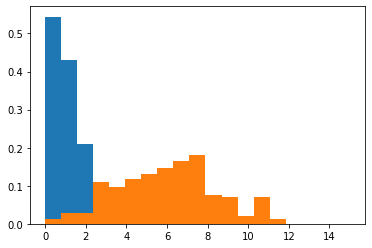

In [17]:
plt.hist(permuted_stats, density=True, bins=np.linspace(0,15,20))
plt.hist(stats, density=True, bins=np.linspace(0,15,20))

In [8]:
abundancs = np
import scipy.sparse
with open('/home/groups/dpwall/briannac/sequence_based_biomarkers/results/generate_biomarkers/biomarker_names_%s_%s.txt' % (biomarker, dataset)) as f:
    biomarkers=[l.replace('\n', '') for l in f.readlines()]
sample_vs_biomarker = scipy.sparse.load_npz('/home/groups/dpwall/briannac/sequence_based_biomarkers/results/generate_biomarkers/sample_vs_biomarker_%s_%s.npz' % (biomarker, dataset))
plt.plot(abundances[sample_data.phenotype], abundances[~sample_data.phenotype], '.')
plt.xlim(0,max(abundances))
plt.ylim(0,max(abundances))


NameError: name 'abundances' is not defined

In [436]:
biomarkers[np.argsort(stats)[::-1][1]]

'g_Veillonella'

In [410]:
sample_data

,Unnamed: 0,phenotype,family,subclass,subject
0,B18011968,False,1,"1,Timepoint 1",9477
1,B18011967,True,1,"1,Timepoint 1",9352
2,B18011970,False,1,"1,Timepoint 2",9477
3,B18011969,True,1,"1,Timepoint 2",9352
4,B18011972,False,1,"1,Timepoint 3",9477
...,...,...,...,...,...
635,B18012337,True,99,"99,Timepoint 1",9450
636,B18012336,False,99,"99,Timepoint 2",9575
637,B18012335,True,99,"99,Timepoint 2",9450
638,B18012334,False,99,"99,Timepoint 3",9575


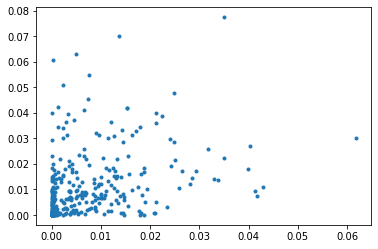

In [417]:
plt.plot(abundances[sample_data.phenotype], abundances[~sample_data.phenotype], '.')

/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.


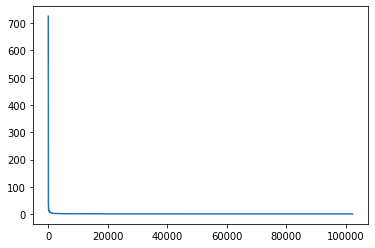

In [332]:
plt.plot([fp/ap for fp, ap in zip(FDR[::-1]/200000, [i/len(FDR) for i in range(len(FDR))])])
a=[fp/ap for fp, ap in zip(FDR[::-1]/200000, [i/len(FDR) for i in range(len(FDR))])]
min(a)

/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.


(0.0, 1.0)

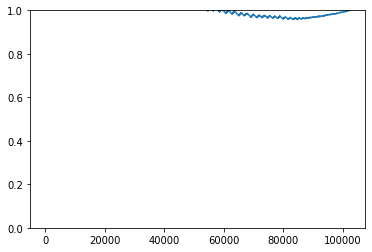

In [315]:
np.argmax(stats)


In [354]:
permuted_phenos = np.load(BIOMARKER_DIR + 'intermediate_files/permutation_test/%s_phenos_permuted.npy' % dataset).astype(int)

In [389]:
np.max(permuted_stats)

6.181078026915482

In [214]:
all_positive_rate = [(i+1)/len(false_positives_frac) for i in range(len(false_positives_frac))]

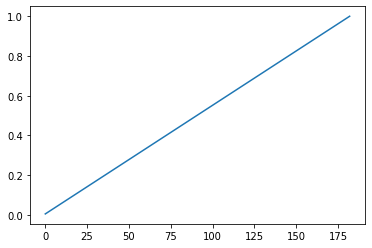

In [221]:
plt.plot(all_positive_rate)

In [228]:
sum(stats>7.4)

51

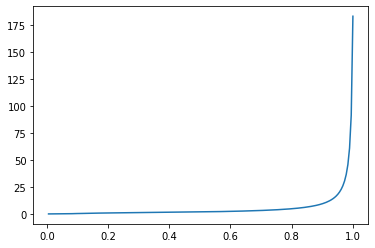

In [220]:
plt.plot(all_positive_rate,
         false_positives_frac/all_positive_rate[::-1])

/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


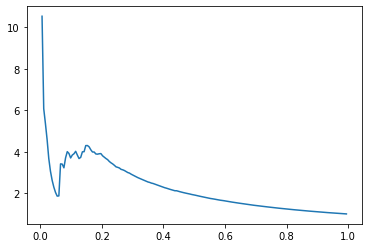

In [185]:
plt.plot(all_positives_frac, false_positives_frac/all_positives_frac)

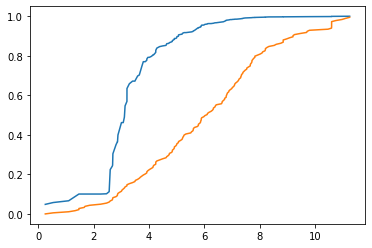

In [190]:
plt.plot(sorted(stats), false_positives_frac)
plt.plot(sorted(stats), all_positives_frac)

In [259]:
fdr = countGreaterThanEqual(sorted(stats), sorted(permuted_stats))

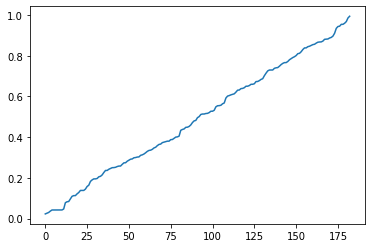

In [262]:
plt.plot(fdr[::-1]/200000)

In [124]:
false_positives_frac = fdr[::-1]
all_positives_frac = np.array([i/len(stats) for i,_ in enumerate(stats)])

/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


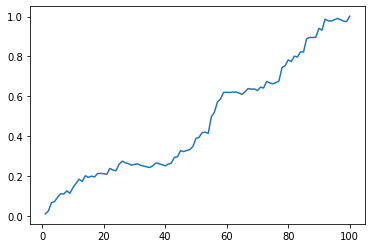

In [128]:
plt.plot([i for i in range(len(stats))],false_positives_frac/all_positives_frac)

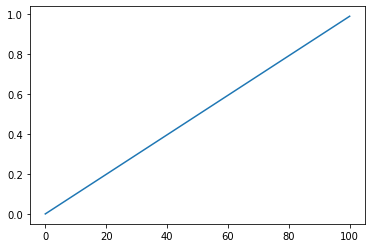

In [111]:
plt.plot(all_positives_frac)

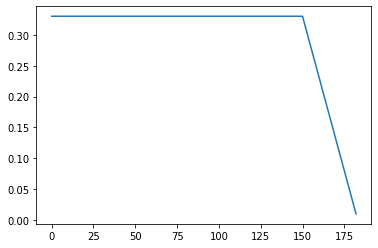

In [93]:
plt.plot(false_positives_frac)